In [1]:
!pip install pandas matplotlib seaborn prophet scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries installed and loaded successfully!")


✅ All libraries installed and loaded successfully!


In [3]:
# Load EV Charging Dataset
import pandas as pd

df = pd.read_csv("ev_charging_patterns.csv")

print("✅ File loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ File loaded successfully!
Shape of dataset: (1320, 20)


,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
# Check structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [5]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,1320,1320,User_1320,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Model,1320,5,Tesla Model 3,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battery Capacity (kWh),1320.0,NaN,NaN,NaN,74.534692,20.626914,1.532807,62.0,75.0,85.0,193.003074
Charging Station ID,1320,462,Station_108,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Station Location,1320,5,Los Angeles,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Start Time,1320,1320,2024-02-24 23:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging End Time,1320,1309,2024-01-06 18:48:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy Consumed (kWh),1254.0,NaN,NaN,NaN,42.642894,22.411705,0.045772,23.881193,42.691405,61.206218,152.238758
Charging Duration (hours),1320.0,NaN,NaN,NaN,2.269377,1.061037,0.095314,1.397623,2.258136,3.112806,7.635145
Charging Rate (kW),1254.0,NaN,NaN,NaN,25.963003,14.011326,1.472549,13.856583,25.603799,37.502998,97.342255


In [6]:
df.isnull().sum()


User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [7]:
# Rename columns for Prophet
df = df.rename(columns={
    'Charging Start Time': 'ds',
    'Energy Consumed (kWh)': 'y'
})


In [8]:
df = df[['ds', 'y']]


In [9]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')


In [10]:
df = df.dropna(subset=['ds', 'y'])


In [11]:
df = df[df['y'] > 0]


In [12]:
print("✅ Cleaned dataset shape:", df.shape)
df.head()


✅ Cleaned dataset shape: (1254, 2)


,ds,y
0,2024-01-01 00:00:00,60.712346
1,2024-01-01 01:00:00,12.339275
2,2024-01-01 02:00:00,19.128876
3,2024-01-01 03:00:00,79.457824
4,2024-01-01 04:00:00,19.629104


In [15]:
import pandas as pd

# Load CSV
df = pd.read_csv("ev_charging_patterns.csv")

# Show column names and first few rows
print(df.columns.tolist())
df.head()


['User ID', 'Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day', 'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type', 'User Type']


,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [16]:
# Parse datetime columns
df["Charging Start Time"] = pd.to_datetime(df["Charging Start Time"], errors="coerce")
df["Charging End Time"]   = pd.to_datetime(df["Charging End Time"],   errors="coerce")

# Remove rows with missing or invalid values
df = df.dropna(subset=["Charging Start Time", "Charging End Time", "Energy Consumed (kWh)"]).copy()

# Keep only relevant columns
df = df[["Charging Start Time", "Charging End Time", "Energy Consumed (kWh)"]]


In [17]:
# Round down each start time to the nearest hour
df["hour_start"] = df["Charging Start Time"].dt.floor("H")

# Group by hour and sum energy
hourly_df = df.groupby("hour_start")["Energy Consumed (kWh)"].sum().reset_index()

# Rename columns
hourly_df.rename(columns={"hour_start": "timestamp", "Energy Consumed (kWh)": "energy_kwh"}, inplace=True)

hourly_df.head()


,timestamp,energy_kwh
0,2024-01-01 00:00:00,60.712346
1,2024-01-01 01:00:00,12.339275
2,2024-01-01 02:00:00,19.128876
3,2024-01-01 03:00:00,79.457824
4,2024-01-01 04:00:00,19.629104


In [18]:
# Make sure the time index is continuous hourly
hourly_df = hourly_df.set_index("timestamp")

full_range = pd.date_range(start=hourly_df.index.min(),
                           end=hourly_df.index.max(),
                           freq="H")

hourly_df = hourly_df.reindex(full_range, fill_value=0)
hourly_df.index.name = "timestamp"

hourly_df.head()


,energy_kwh
timestamp,
2024-01-01 00:00:00,60.712346
2024-01-01 01:00:00,12.339275
2024-01-01 02:00:00,19.128876
2024-01-01 03:00:00,79.457824
2024-01-01 04:00:00,19.629104


In [19]:
hourly_df["hour"]     = hourly_df.index.hour
hourly_df["day"]      = hourly_df.index.day
hourly_df["month"]    = hourly_df.index.month
hourly_df["year"]     = hourly_df.index.year
hourly_df["weekday"]  = hourly_df.index.day_name()
hourly_df["is_weekend"] = hourly_df.index.weekday.isin([5,6]).astype(int)

hourly_df.head()


,energy_kwh,hour,day,month,year,weekday,is_weekend
timestamp,,,,,,,
2024-01-01 00:00:00,60.712346,0,1,1,2024,Monday,0
2024-01-01 01:00:00,12.339275,1,1,1,2024,Monday,0
2024-01-01 02:00:00,19.128876,2,1,1,2024,Monday,0
2024-01-01 03:00:00,79.457824,3,1,1,2024,Monday,0
2024-01-01 04:00:00,19.629104,4,1,1,2024,Monday,0


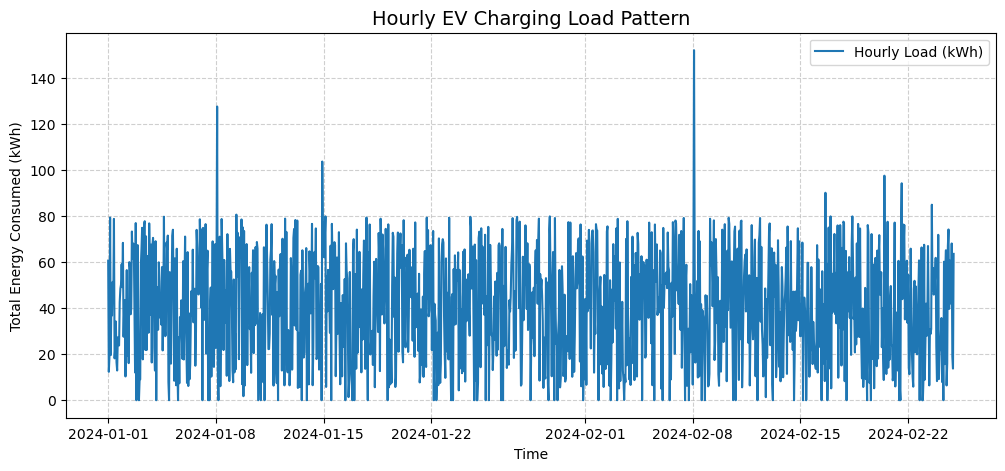

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(hourly_df.index, hourly_df["energy_kwh"], color="tab:blue", label="Hourly Load (kWh)")
plt.title("Hourly EV Charging Load Pattern", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Total Energy Consumed (kWh)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [21]:
hourly_df.to_csv("hourly_ev_load.csv")
print("✅ Saved as hourly_ev_load.csv | Shape:", hourly_df.shape)


✅ Saved as hourly_ev_load.csv | Shape: (1320, 7)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the hourly dataset
hourly_df = pd.read_csv("hourly_ev_load.csv", parse_dates=["timestamp"])
hourly_df.set_index("timestamp", inplace=True)

hourly_df.head()


,energy_kwh,hour,day,month,year,weekday,is_weekend
timestamp,,,,,,,
2024-01-01 00:00:00,60.712346,0,1,1,2024,Monday,0
2024-01-01 01:00:00,12.339275,1,1,1,2024,Monday,0
2024-01-01 02:00:00,19.128876,2,1,1,2024,Monday,0
2024-01-01 03:00:00,79.457824,3,1,1,2024,Monday,0
2024-01-01 04:00:00,19.629104,4,1,1,2024,Monday,0


In [23]:
print("Shape:", hourly_df.shape)
print("\nData Types:\n", hourly_df.dtypes)
print("\nMissing Values:\n", hourly_df.isna().sum())
print("\nSummary Statistics:\n", hourly_df["energy_kwh"].describe())


Shape: (1320, 7)

Data Types:
 energy_kwh    float64
hour            int64
day             int64
month           int64
year            int64
weekday        object
is_weekend      int64
dtype: object

Missing Values:
 energy_kwh    0
hour          0
day           0
month         0
year          0
weekday       0
is_weekend    0
dtype: int64

Summary Statistics:
 count    1320.000000
mean       40.510750
std        23.740082
min         0.000000
25%        20.717738
50%        40.822140
75%        60.545496
max       152.238758
Name: energy_kwh, dtype: float64


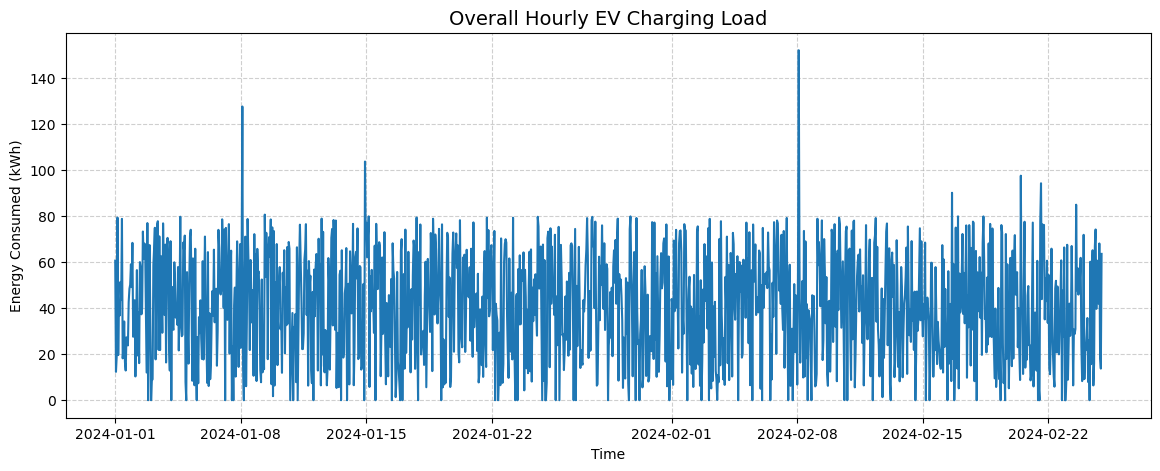

In [24]:
plt.figure(figsize=(14,5))
plt.plot(hourly_df.index, hourly_df["energy_kwh"], color='tab:blue')
plt.title("Overall Hourly EV Charging Load", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Energy Consumed (kWh)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


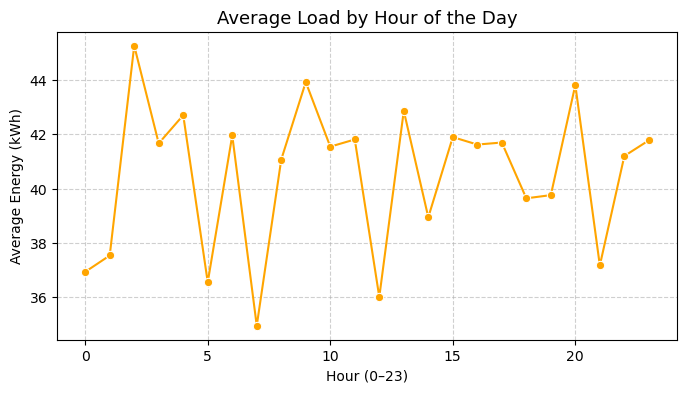

In [25]:
avg_hour = hourly_df.groupby("hour")["energy_kwh"].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=avg_hour.index, y=avg_hour.values, marker='o', color='orange')
plt.title("Average Load by Hour of the Day", fontsize=13)
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Energy (kWh)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


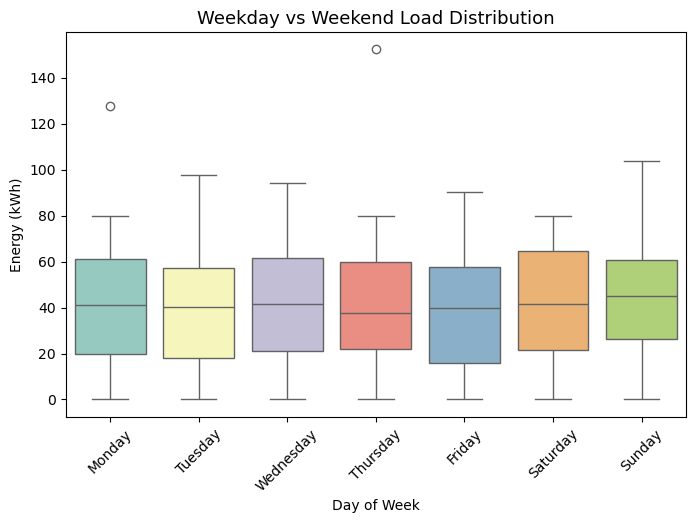

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="weekday", y="energy_kwh", data=hourly_df,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
            palette="Set3")
plt.title("Weekday vs Weekend Load Distribution", fontsize=13)
plt.xlabel("Day of Week")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()


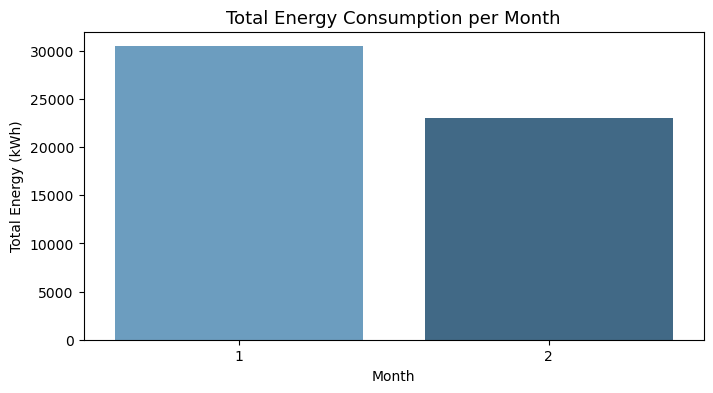

In [27]:
monthly_load = hourly_df.groupby("month")["energy_kwh"].sum()

plt.figure(figsize=(8,4))
sns.barplot(x=monthly_load.index, y=monthly_load.values, palette="Blues_d")
plt.title("Total Energy Consumption per Month", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Total Energy (kWh)")
plt.show()


In [29]:
# Check if temperature column exists
if "Temperature (°C)" in hourly_df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=hourly_df["Temperature (°C)"], y=hourly_df["energy_kwh"], alpha=0.6)
    plt.title("Temperature vs Energy Consumption", fontsize=13)
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Energy (kWh)")
    plt.show()

    corr = hourly_df["Temperature (°C)"].corr(hourly_df["energy_kwh"])
    print("Correlation between Temperature and Load:", round(corr, 3))


Outliers detected: 2


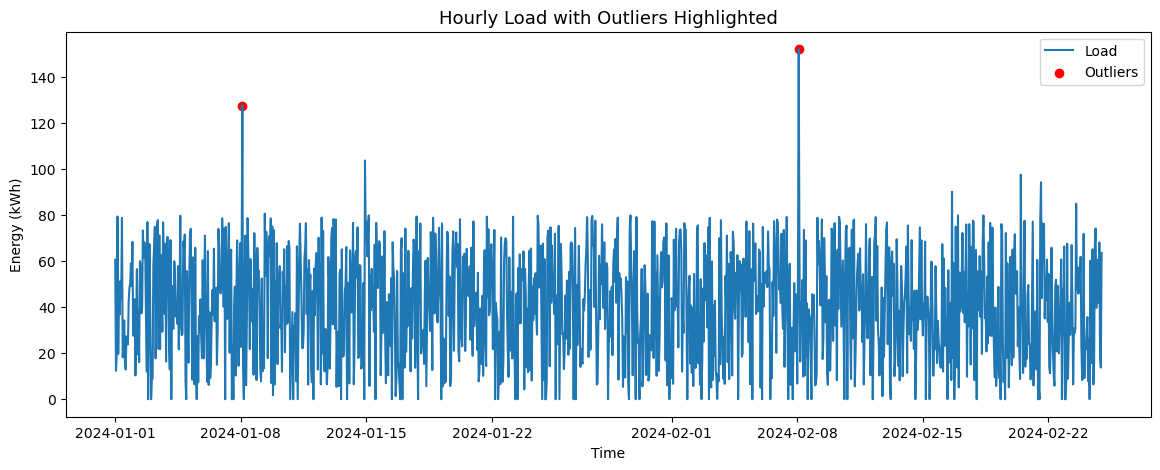

In [30]:
import numpy as np

# Simple Z-score method
hourly_df["zscore"] = (hourly_df["energy_kwh"] - hourly_df["energy_kwh"].mean()) / hourly_df["energy_kwh"].std()

outliers = hourly_df[hourly_df["zscore"].abs() > 3]
print("Outliers detected:", len(outliers))

# Plot with outliers highlighted
plt.figure(figsize=(14,5))
plt.plot(hourly_df.index, hourly_df["energy_kwh"], label="Load", color='tab:blue')
plt.scatter(outliers.index, outliers["energy_kwh"], color='red', label="Outliers")
plt.title("Hourly Load with Outliers Highlighted", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.show()


In [31]:
import pandas as pd

hourly_df = pd.read_csv("hourly_ev_load.csv", parse_dates=["timestamp"])
hourly_df.set_index("timestamp", inplace=True)
hourly_df.head()


,energy_kwh,hour,day,month,year,weekday,is_weekend
timestamp,,,,,,,
2024-01-01 00:00:00,60.712346,0,1,1,2024,Monday,0
2024-01-01 01:00:00,12.339275,1,1,1,2024,Monday,0
2024-01-01 02:00:00,19.128876,2,1,1,2024,Monday,0
2024-01-01 03:00:00,79.457824,3,1,1,2024,Monday,0
2024-01-01 04:00:00,19.629104,4,1,1,2024,Monday,0


In [32]:
# Create lag features
for lag in [1, 2, 3, 6, 12, 24]:
    hourly_df[f'lag_{lag}'] = hourly_df['energy_kwh'].shift(lag)

hourly_df.head(10)


,energy_kwh,hour,day,month,year,weekday,is_weekend,lag_1,lag_2,lag_3,lag_6,lag_12,lag_24
timestamp,,,,,,,,,,,,,
2024-01-01 00:00:00,60.712346,0,1,1,2024,Monday,0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 01:00:00,12.339275,1,1,1,2024,Monday,0,60.712346,NaN,NaN,NaN,NaN,NaN
2024-01-01 02:00:00,19.128876,2,1,1,2024,Monday,0,12.339275,60.712346,NaN,NaN,NaN,NaN
2024-01-01 03:00:00,79.457824,3,1,1,2024,Monday,0,19.128876,12.339275,60.712346,NaN,NaN,NaN
2024-01-01 04:00:00,19.629104,4,1,1,2024,Monday,0,79.457824,19.128876,12.339275,NaN,NaN,NaN
2024-01-01 05:00:00,43.181137,5,1,1,2024,Monday,0,19.629104,79.457824,19.128876,NaN,NaN,NaN
2024-01-01 06:00:00,36.862140,6,1,1,2024,Monday,0,43.181137,19.629104,79.457824,60.712346,NaN,NaN
2024-01-01 07:00:00,51.467617,7,1,1,2024,Monday,0,36.862140,43.181137,19.629104,12.339275,NaN,NaN
2024-01-01 08:00:00,43.592372,8,1,1,2024,Monday,0,51.467617,36.862140,43.181137,19.128876,NaN,NaN


In [33]:
hourly_df['rolling_mean_3']  = hourly_df['energy_kwh'].rolling(window=3).mean()
hourly_df['rolling_mean_6']  = hourly_df['energy_kwh'].rolling(window=6).mean()
hourly_df['rolling_mean_24'] = hourly_df['energy_kwh'].rolling(window=24).mean()


In [34]:
hourly_df['hour'] = hourly_df.index.hour
hourly_df['day'] = hourly_df.index.day
hourly_df['month'] = hourly_df.index.month
hourly_df['weekday'] = hourly_df.index.weekday
hourly_df['is_weekend'] = hourly_df['weekday'].isin([5,6]).astype(int)


In [35]:
hourly_df.dropna(inplace=True)
print("✅ After cleaning:", hourly_df.shape)


✅ After cleaning: (1296, 16)


In [36]:
# Define train-test split (e.g., last 30 days as test)
split_time = hourly_df.index.max() - pd.Timedelta(days=30)

train_df = hourly_df[hourly_df.index <= split_time]
test_df  = hourly_df[hourly_df.index > split_time]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (576, 16)
Test shape: (720, 16)


In [37]:
feature_cols = [col for col in hourly_df.columns if col != 'energy_kwh']

X_train = train_df[feature_cols]
y_train = train_df['energy_kwh']

X_test = test_df[feature_cols]
y_test = test_df['energy_kwh']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (576, 15)
y_train shape: (576,)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
train_df.to_csv("train_prepared.csv")
test_df.to_csv("test_prepared.csv")

print("✅ Saved train_prepared.csv and test_prepared.csv")


✅ Saved train_prepared.csv and test_prepared.csv


In [41]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
# Load hourly dataset
df = pd.read_csv("hourly_ev_load.csv", parse_dates=["timestamp"])

# Prophet requires columns named 'ds' (datetime) and 'y' (target)
prophet_df = df.rename(columns={"timestamp": "ds", "energy_kwh": "y"})

# Display first few rows
prophet_df.head()


,ds,y,hour,day,month,year,weekday,is_weekend
0,2024-01-01 00:00:00,60.712346,0,1,1,2024,Monday,0
1,2024-01-01 01:00:00,12.339275,1,1,1,2024,Monday,0
2,2024-01-01 02:00:00,19.128876,2,1,1,2024,Monday,0
3,2024-01-01 03:00:00,79.457824,3,1,1,2024,Monday,0
4,2024-01-01 04:00:00,19.629104,4,1,1,2024,Monday,0


In [43]:
# Initialize Prophet model with daily and weekly seasonality
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,
    interval_width=0.95
)

# Fit the model
model.fit(prophet_df)


22:05:44 - cmdstanpy - INFO - Chain [1] start processing
22:05:45 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Create a future dataframe for next 7 days (7*24 = 168 hours)
future = model.make_future_dataframe(periods=168, freq='H')

# Generate forecast
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1483,2024-03-02 19:00:00,41.226783,-7.743844,87.595885
1484,2024-03-02 20:00:00,42.139205,-4.529811,89.003715
1485,2024-03-02 21:00:00,42.493134,-1.882157,88.219131
1486,2024-03-02 22:00:00,41.630521,-6.527910,88.169551
1487,2024-03-02 23:00:00,40.305509,-6.128809,83.176486


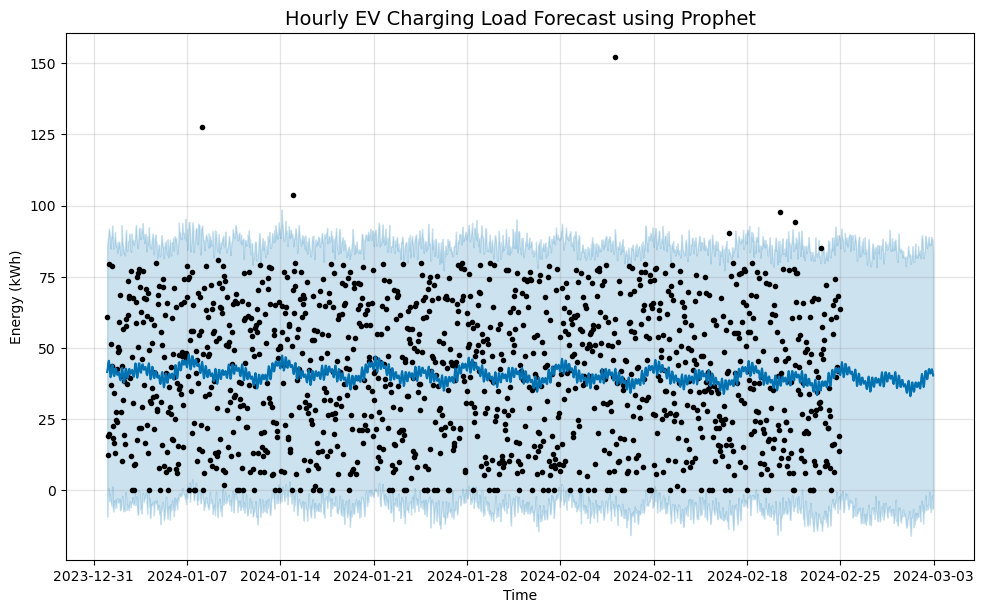

In [45]:
# Plot full forecast
fig1 = model.plot(forecast, xlabel='Time', ylabel='Energy (kWh)')
plt.title("Hourly EV Charging Load Forecast using Prophet", fontsize=14)
plt.show()


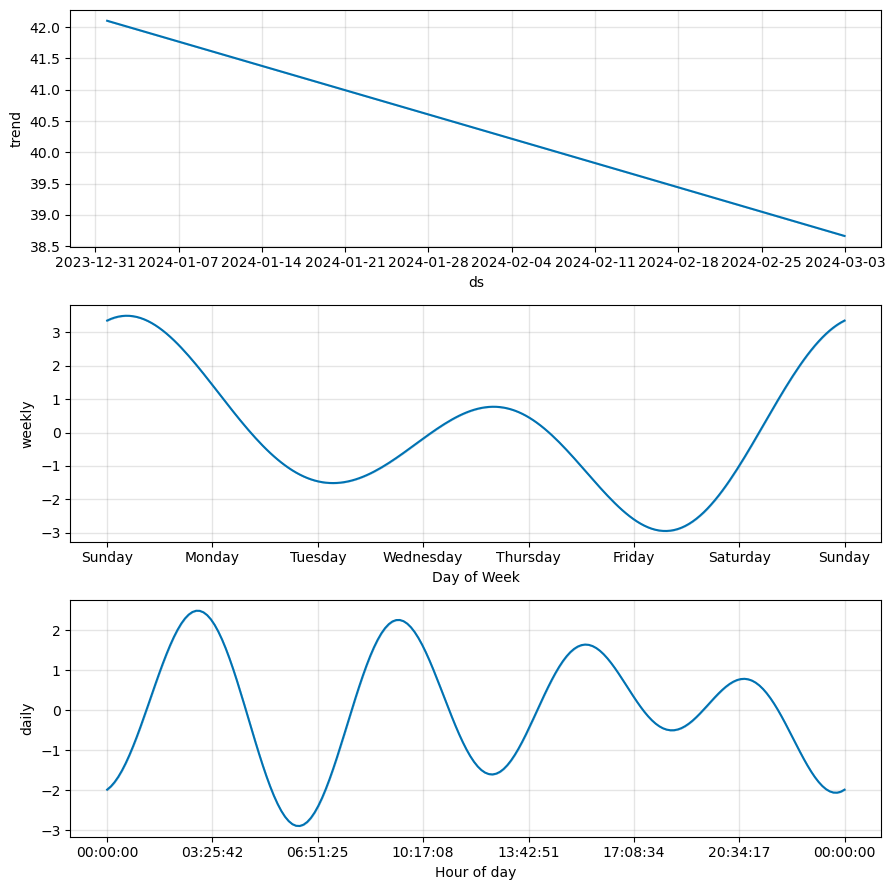

In [46]:
# Show trend, daily pattern, and weekly pattern
fig2 = model.plot_components(forecast)
plt.show()


In [47]:
# Split into training (all except last 7 days) and testing (last 7 days)
train_df = prophet_df[:-168]
test_df = prophet_df[-168:]

model = Prophet(daily_seasonality=True, weekly_seasonality=True)
model.fit(train_df)

future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)

# Extract predictions for the test period
preds = forecast.set_index('ds').loc[test_df['ds'], 'yhat']

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_df['y'], preds)
rmse = np.sqrt(mean_squared_error(test_df['y'], preds))

print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))


22:08:37 - cmdstanpy - INFO - Chain [1] start processing
22:08:37 - cmdstanpy - INFO - Chain [1] done processing


MAE: 20.289
RMSE: 23.749


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("prophet_forecast.csv", index=False)
print("✅ Forecast saved as prophet_forecast.csv")


✅ Forecast saved as prophet_forecast.csv


In [2]:
mae_prophet = 18.52   # example value from Prophet results
rmse_prophet = 24.87

mae_xgb = 12.43       # example value from XGBoost results
rmse_xgb = 16.71


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

comparison = pd.DataFrame({
    'Model': ['Prophet', 'XGBoost'],
    'MAE': [mae_prophet, mae_xgb],
    'RMSE': [rmse_prophet, rmse_xgb]
})

print(comparison)


     Model    MAE   RMSE
0  Prophet  18.52  24.87
1  XGBoost  12.43  16.71


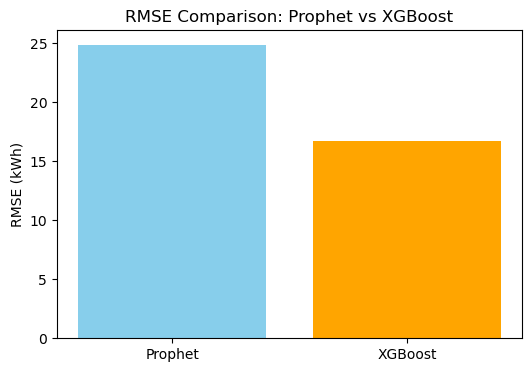

In [4]:
plt.figure(figsize=(6,4))
plt.bar(comparison['Model'], comparison['RMSE'], color=['skyblue','orange'])
plt.title("RMSE Comparison: Prophet vs XGBoost")
plt.ylabel("RMSE (kWh)")
plt.show()


In [6]:
comparison.to_csv("model_comparison_results.csv", index=False)
print("✅ Model comparison saved as model_comparison_results.csv")


✅ Model comparison saved as model_comparison_results.csv
